In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# creating database connection 
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [ ]:
# Summary Statistics
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073825e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


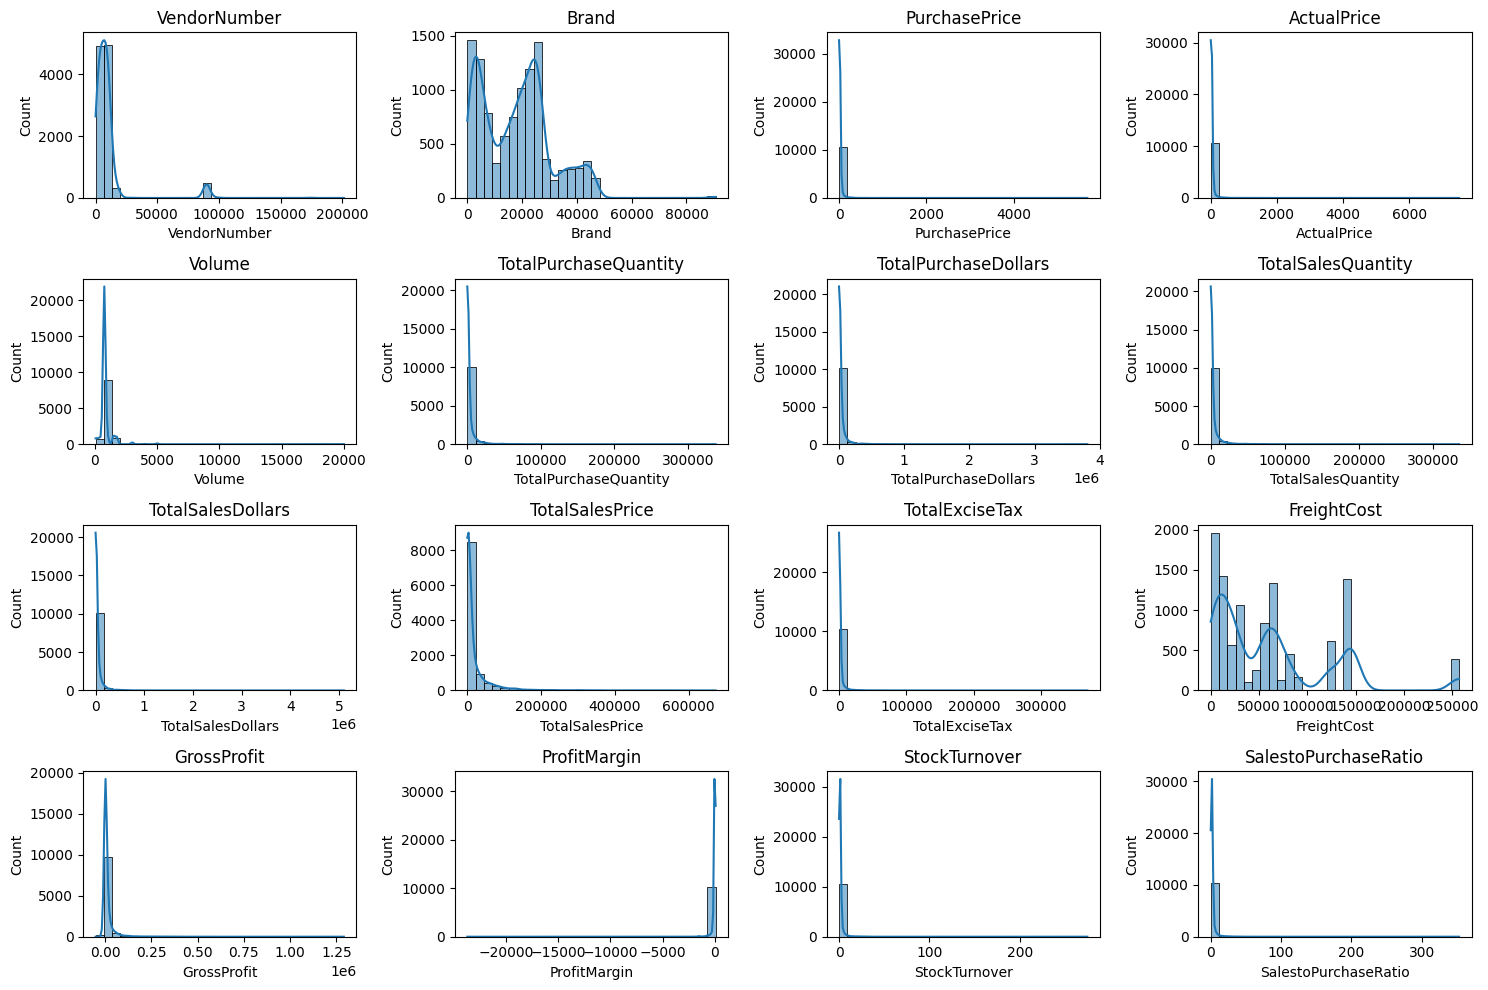

In [ ]:
# Distribution plots for Numarical Columnns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

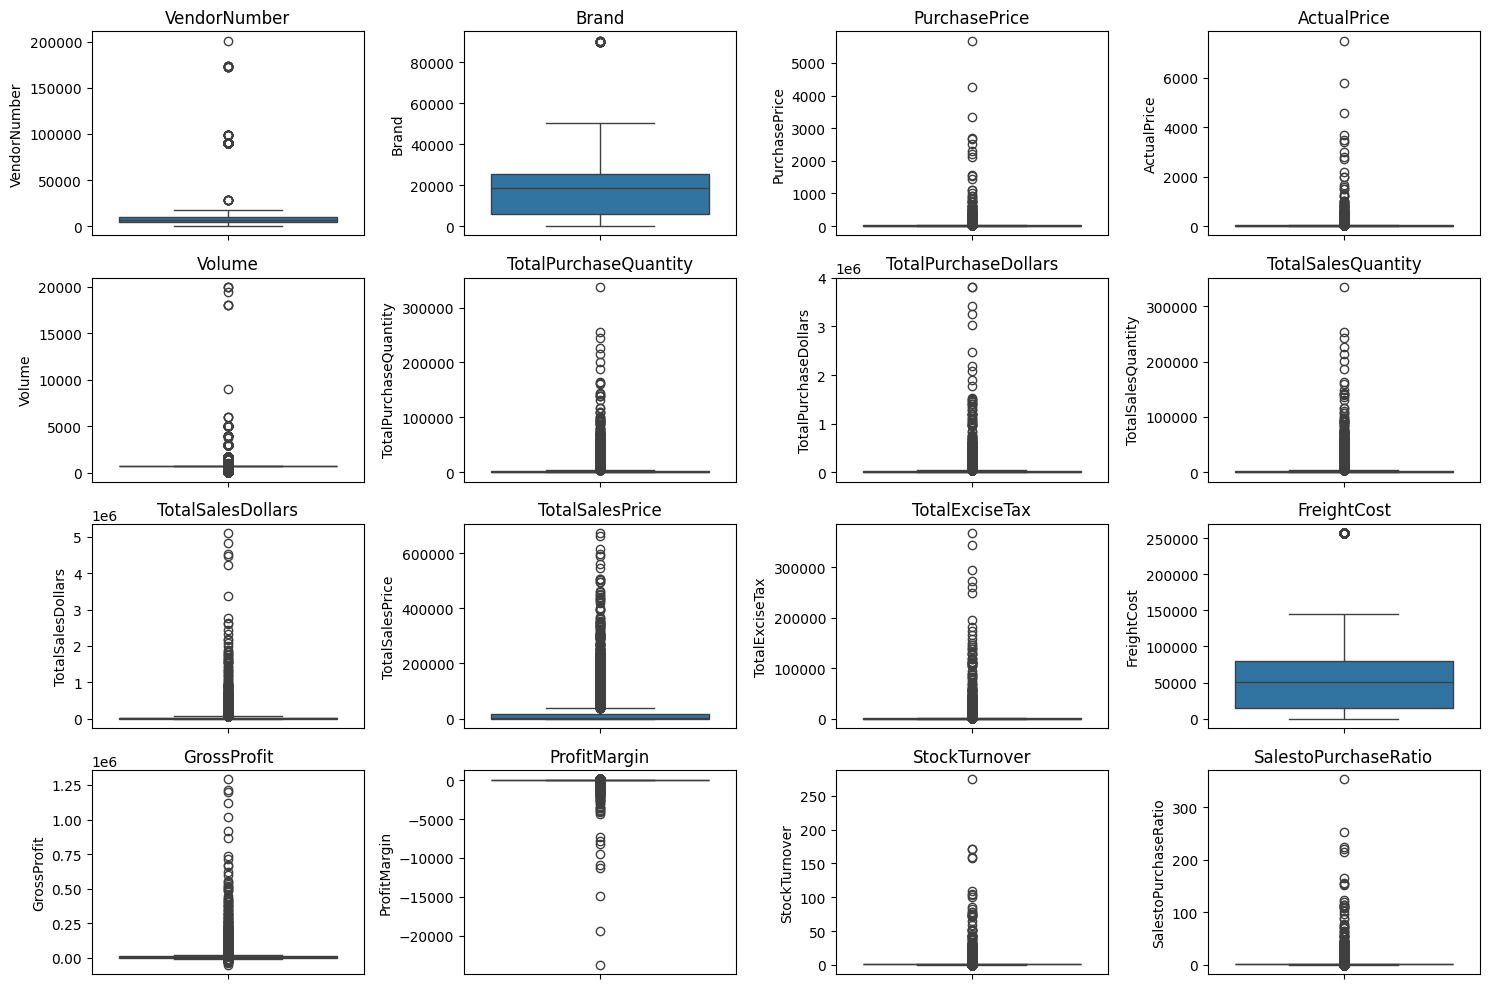

In [ ]:
# Outlier detaction with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query('''SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0''',conn) 


In [ ]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


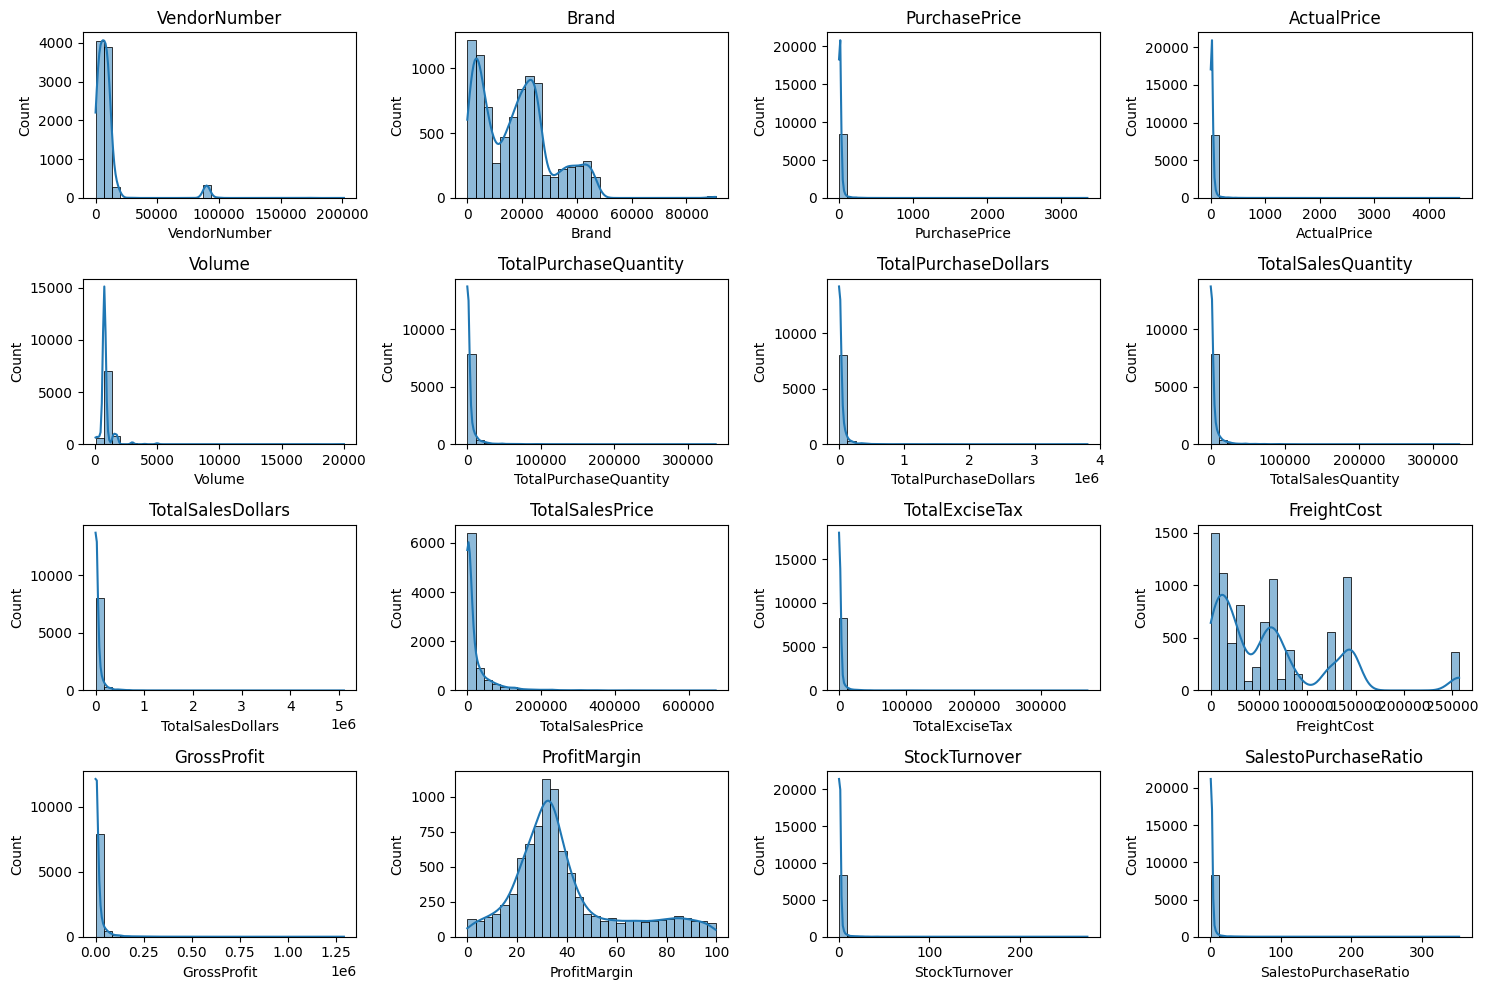

In [ ]:
# Distribution plots for Numarical Columnns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

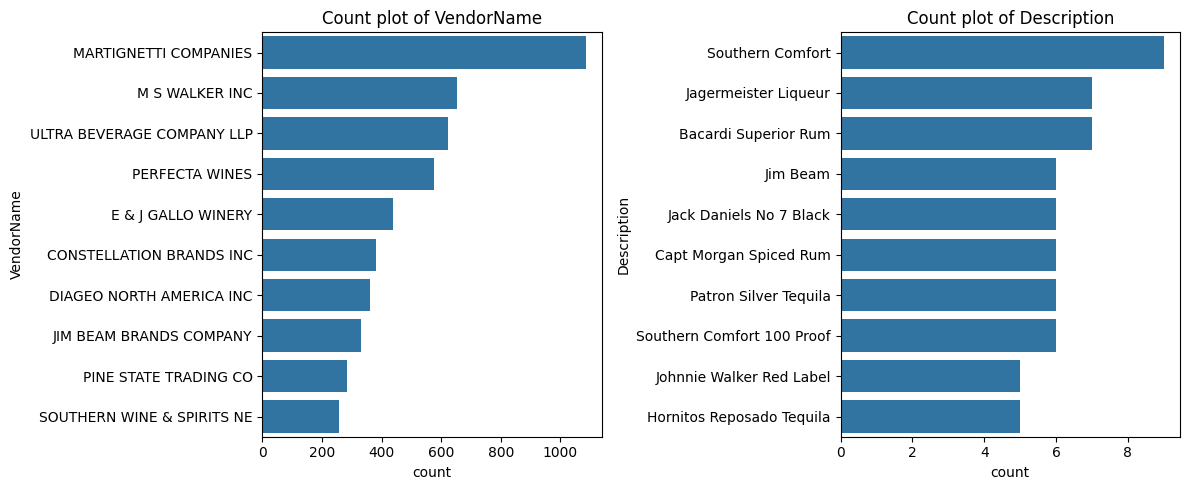

In [ ]:
# Count Plots for Categorical Columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1) # Adjust grid layout as needed
    sns.countplot(y = df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

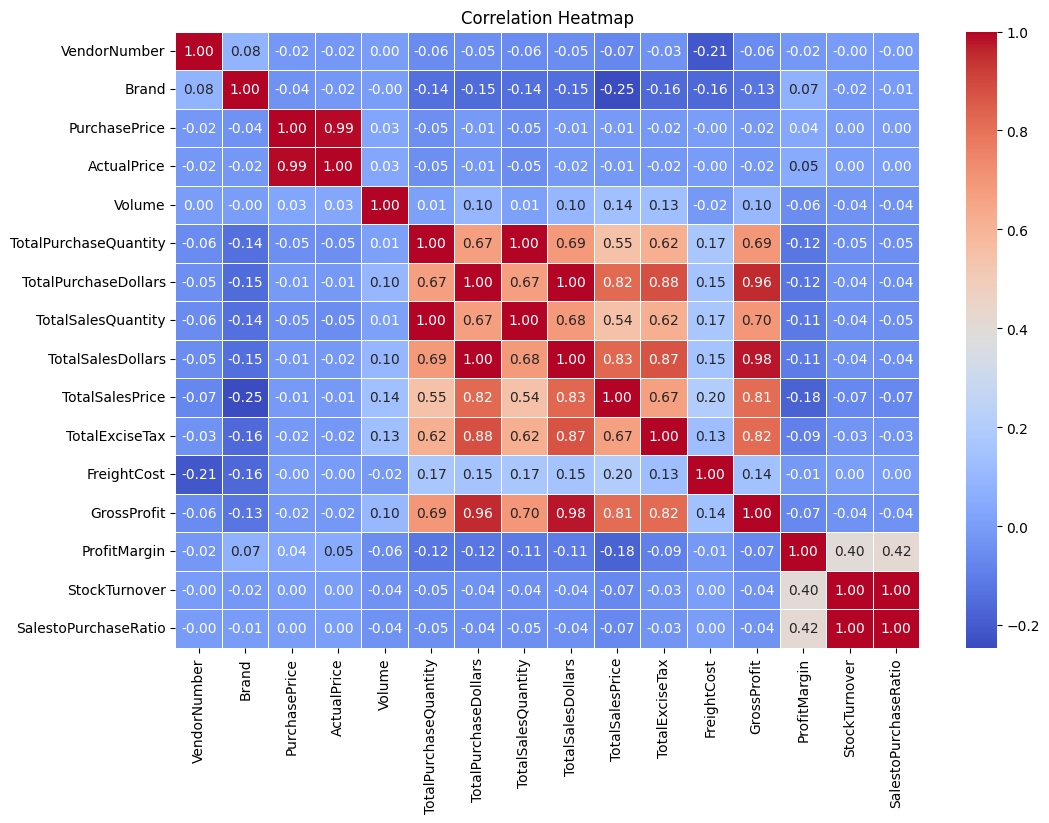

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, fmt ='.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin' : 'mean'}).reset_index()

In [ ]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [ ]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [ ]:
low_sales_threshold

np.float64(560.299)

In [ ]:
high_margin_threshold

np.float64(64.97017552750113)

In [ ]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print('Brands With low Sales but High Profit Margin')
display(target_brands.sort_values('TotalSalesDollars'))

Brands With low Sales but High Profit Margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


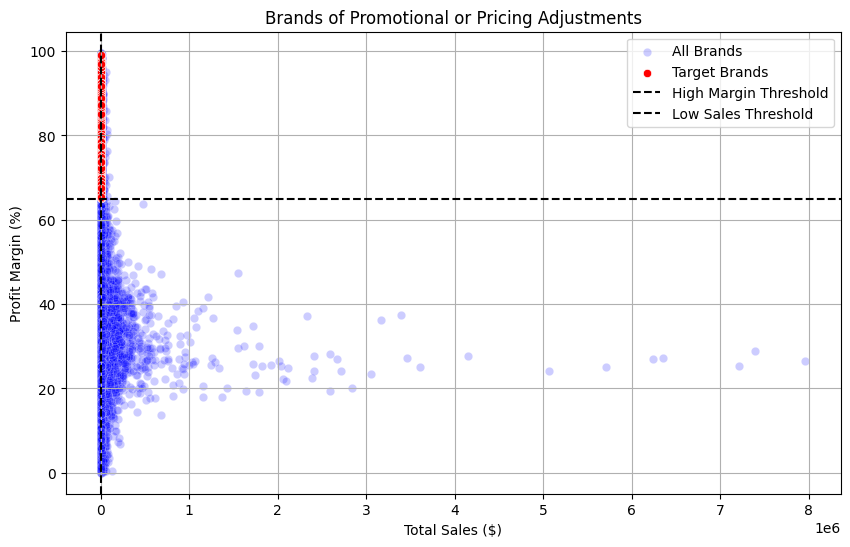

In [ ]:
plt.figure(figsize= (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands of Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# for better visualization 
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

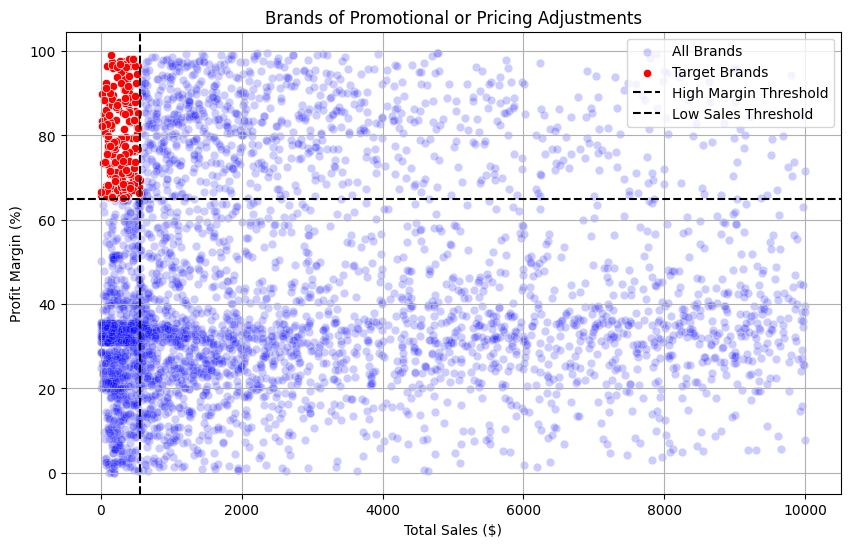

In [ ]:
plt.figure(figsize= (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color='blue', label='All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands of Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def format_dollars(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.2f}M'
    elif value>=1_000:
        return f'{value/1_000:.2f}k'
    else:
        return str(value)
    

In [ ]:
# Top vendors and Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [ ]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [ ]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

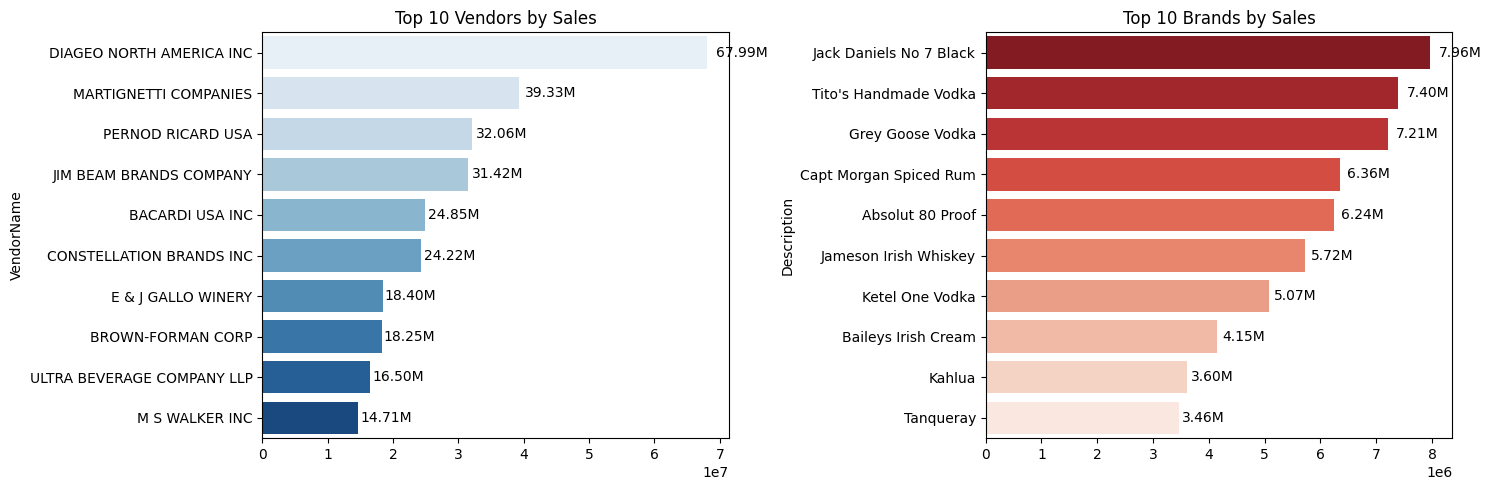

In [ ]:
plt.figure(figsize=(15,5))

# Plot for the Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() *0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() *0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


In [ ]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [ ]:
vendor_performance ['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [ ]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [ ]:
vendor_performance.sort_values('PurchaseContribution%', ascending = False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
107,UNCORKED,118.74,58.20,176.94,0.000039
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [ ]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [ ]:
# Display top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300345
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297724
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760554
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644441
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671930
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.969671
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.307609
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.926791
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.633480
53,M S WALKER INC,9.76M,4.94M,14.71M,3.177055


In [ ]:
 top_vendors['PurchaseContribution%'].sum()

np.float64(65.68960039360739)

In [ ]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()*100
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.300345,1630.034517
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.297724,2459.806935
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.760554,3235.862295
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.644441,4000.306356
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.671930,4567.499331
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.969671,5064.466394
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.307609,5495.227326
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.926791,5887.906463
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.633480,6251.254494
53,M S WALKER INC,9.76M,4.94M,14.71M,3.177055,6568.960039


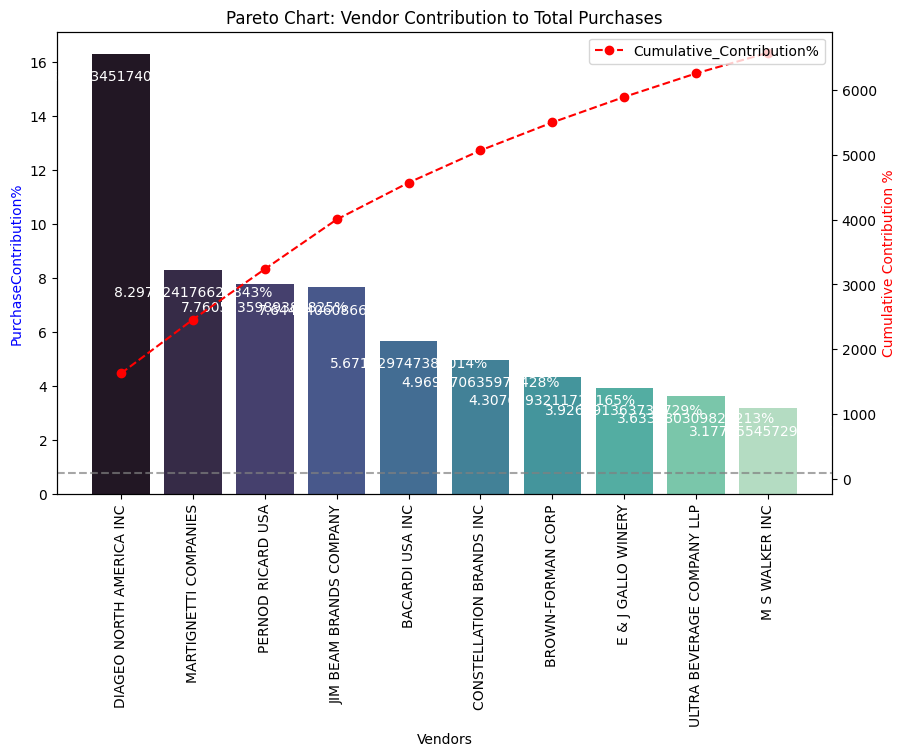

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha = 'center', fontsize = 10, color='white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color = 'red', marker= 'o', linestyle='dashed', label = 'Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('PurchaseContribution%', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color= 'gray', linestyle= 'dashed', alpha= 0.7)
ax2.legend(loc= 'upper right')

plt.show()

In [ ]:
print(f'Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %')

Total Purchase Contribution of top 10 vendors is 65.69 %


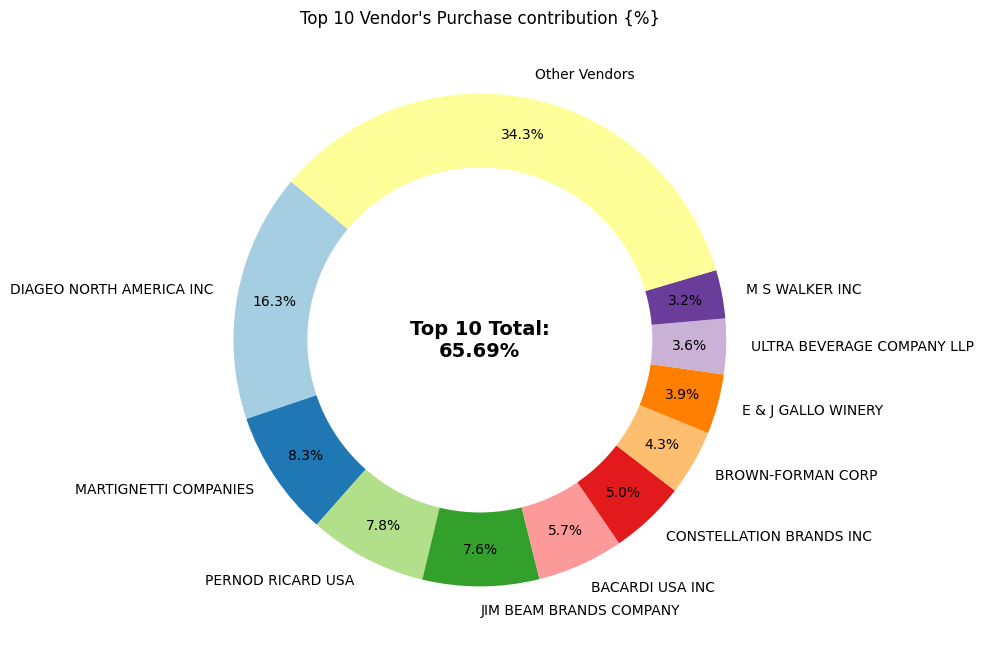

In [ ]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append 'Other Vendors' category
vendors.append('Other Vendors')
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels= vendors, autopct= '%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a 'donut' effect
centre_circle = plt.Circle((0,0),0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

# Add total Contribution annotation in the center
plt.text(0,0,f'Top 10 Total:\n{total_contribution:.2f}%', fontsize = 14, fontweight = 'bold', ha='center', va= 'center')

plt.title("Top 10 Vendor's Purchase contribution {%}")
plt.show()
          

In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [ ]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [ ]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['Small', 'Medium', 'Large'])

In [ ]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


In [ ]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [ ]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


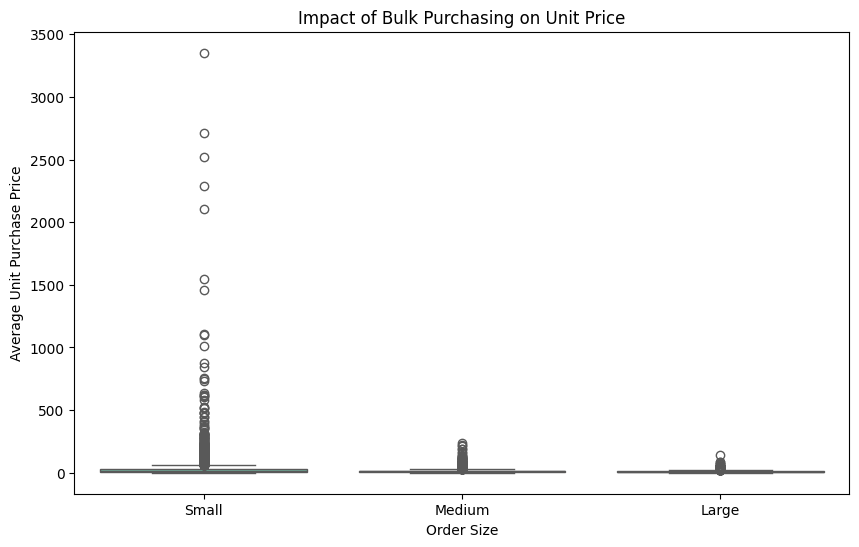

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x= 'OrderSize', y= 'UnitPurchasePrice', palette = 'Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

In [ ]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending= True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [ ]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [ ]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


In [ ]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [ ]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()


In [ ]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [ ]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [ ]:

def confidence_interval(data, confidence= 0.95):
    mean_val =np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) /2, df = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val- margin_of_error, mean_val + margin_of_error

<function confidence_interval at 0x000001F8C2D35C60>


Top Vendors 95% CI: (30.74, 31.61, Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64, Mean: 41.57


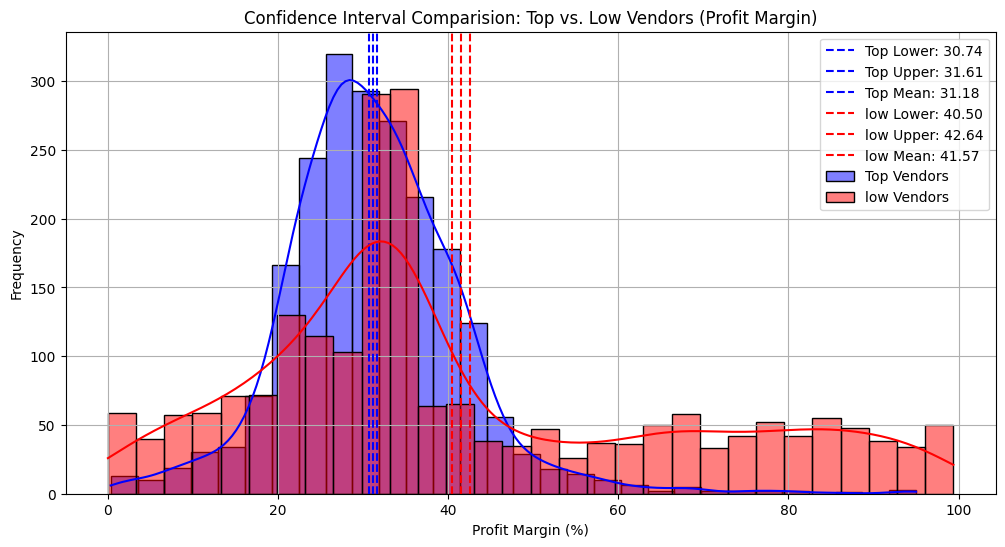

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}')

plt.figure(figsize = (12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color = 'blue', bins = 30, alpha = 0.5, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label = f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label = f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='--', label = f'Top Mean: {top_mean:.2f}')


# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color = 'red', bins = 30, alpha = 0.5, label='low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label = f'low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label = f'low Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='--', label = f'low Mean: {low_mean:.2f}')


# Finalize Plot
plt.title('Confidence Interval Comparision: Top vs. Low Vendors (Profit Margin)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors,low_vendors, equal_var = False)

# Print results
print(f'T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}')
if p_value < 0.05:
    print('Reject H_0: There is a significant difference in Profit Margins between top and low_performing vendors.')
else:
    print('Fail to Reject H_0 : No significant difference in profit margins.')


T-Statistic: -17.6695, P-Value: 0.0000
Reject H_0: There is a significant difference in Profit Margins between top and low_performing vendors.


In [ ]:


import sqlite3
import pandas as pd

# Step 1: Connect to your SQLite database
conn = sqlite3.connect('inventory.db')

# Step 2: Read the table into a DataFrame
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

# Step 3: Export to CSV
df.to_csv('vendor_sales_summary.csv', index=False)

# Step 4: Close the connection
conn.close()

print("Export complete! 'vendor_sales_summary.csv' has been saved.")

Export complete! 'vendor_sales_summary.csv' has been saved.
